In [18]:

# Assignment 3
# Determining and removing drawbacks of exponential and running mean.
# Team 2:
#     Ekaterina Karmanova
#     Timur Chikichev
#     Iaroslav Okunevich
#     Nikita Mikhailovskiy
#
# Skoltech, 04.10.2019


import os
try:
	os.chdir(os.path.join(os.getcwd(), 'lab3'))
	print(os.getcwd())
except:
	pass

import numpy as np
from functools import partial

import smoothing as sm
from walking_model import Random_walking_model, rvm_alpha

from noised_signal import Measurements



In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# from plotting import new_plot, draw_plots

def draw_plots(plots=[], show=False):
    for pi, plabel in plots:
        plt.plot(pi, label=plabel)

    plt.legend()
    if show:
        plt.show()


def new_plot(title, xl, yl, plots=[], show=False):
    figure(num=None, figsize=(10, 5), dpi=100,
           facecolor='w', edgecolor='k')
    plt.title(title)
    plt.ylabel(yl)
    plt.xlabel(xl)
    if plots:
        draw_plots(plots, show)

Optimal smoothing coefficient= 0.24998861233121078


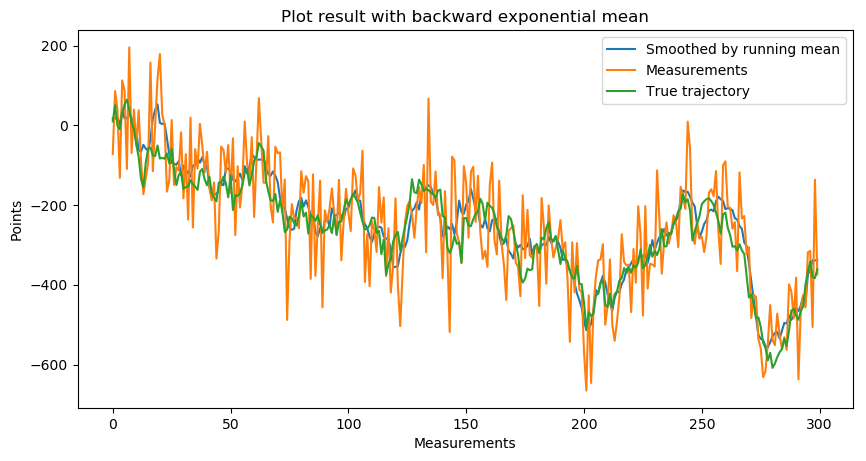

In [20]:
sigmasTrue = [28, 97]
alpha = rvm_alpha(sigmasTrue)

model = Random_walking_model(10, sigmasTrue[0], 300)
x = model.x

Known_vals = Measurements(x, sigmasTrue[1])
z = Known_vals.z

RM = sm.RunningMean(z, alpha)
r300 = RM.run(RM.m)

Expsmoothing = sm.FB_exp_smoothing(z)
exp300 = Expsmoothing.run_f(alpha)
bexp300 = Expsmoothing.run_fb(alpha)

new_plot('Plot result with backward exponential mean',
         'Measurements', 'Points',[])

draw_plots([
             [r300, 'Smoothed by running mean'],
             [z, 'Measurements'],
             [x, 'True trajectory']], show=True)
# plt.savefig(fname='FB exp smoothing.png')

In [21]:
#1.3
indTru = Known_vals.DevVarInd(x)
print('Indicator tru trajectory:\n', indTru)

indEx = Known_vals.DevVarInd(exp300)
print('Indicator forward expotnentially smoothing:\n', indEx)

indBex = Known_vals.DevVarInd(bexp300)
print('Indicator backward expotnentially smoothing:\n', indBex)

indR = Known_vals.DevVarInd(r300)
print('Indicator running smoothing:\n', indR)

indZ = Known_vals.DevVarInd(z)
print('Indicator measurements:\n', indZ)

Indicator tru trajectory:
 (2514429.028158227, 554899.7578624941)
Indicator forward expotnentially smoothing:
 (1946673.8308963305, 441542.8851648414)
Indicator backward expotnentially smoothing:
 (2234250.2652116907, 15456.019830568393)
Indicator running smoothing:
 (2241632.5137570584, 219522.97057187548)
Indicator measurements:
 (0.0, 16588502.564412234)


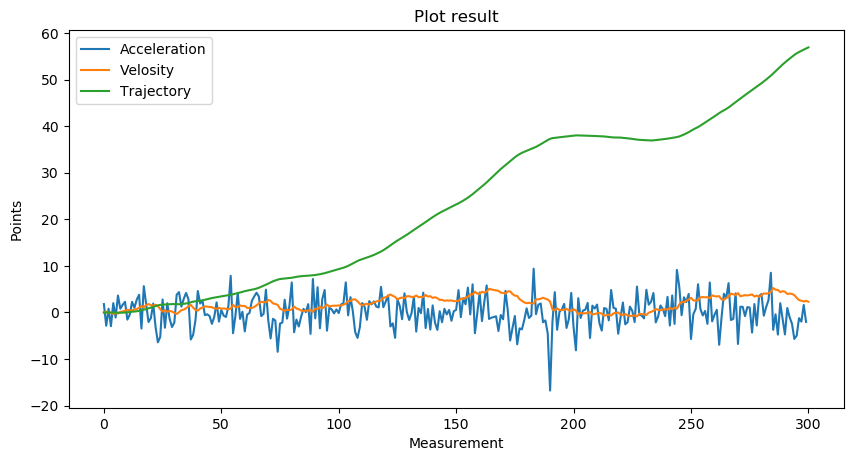

In [22]:
a = np.random.normal(0, np.sqrt(10), 300)
sig = np.sqrt(500)

def Trajectory(size, acc, t):
    vel = Random_walking_model.TrueTrajectory(0, acc * t)
    trajectory = Random_walking_model.TrueTrajectory(
        0, vel[:-1]*t + acc * t * t / 2)

    new_plot('Plot result', 'Measurement', 'Points',
    [
        [acc, 'Acceleration'],
        [vel, 'Velosity'],
        [trajectory, 'Trajectory']
    ], show = False)
    plt.savefig(fname='Trajectory.png')
    return trajectory

traject = Trajectory(300, a, 0.1)


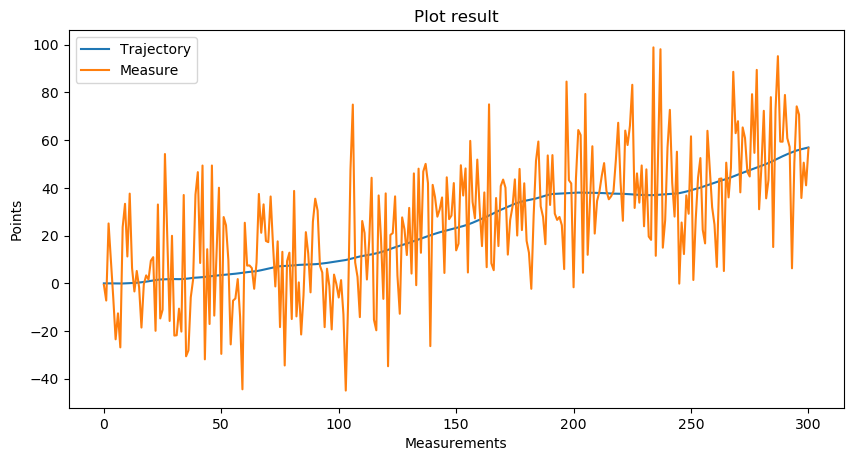

In [23]:
Known_vals = Measurements(traject, sig)
z = Known_vals.z

RM = sm.RunningMean(z, 1)

new_plot('Plot result',
        'Measurements', 'Points', [
            [traject, 'Trajectory'],
            [z, 'Measure']
        ], show = False)
plt.savefig(fname = 'running mean 1.png')


a: 13.0 ki: [507152.9286440162, 14975.066307727648] res: 522127.99495174387
a: 27.0 ki: [554059.5392470598, 3288.9299400173086] res: 557348.4691870771
a: 40.0 ki: [549977.1684703433, 1272.9918497966787] res: 551250.1603201401
a: 54.0 ki: [551152.4940629804, 1138.684437898381] res: 552291.1785008787
a: 67.0 ki: [556049.7862978076, 1093.5246893031815] res: 557143.3109871107
a: 80.0 ki: [564914.3247960522, 839.433136552972] res: 565753.7579326051
a: 94.0 ki: [575622.9457490665, 397.488437808198] res: 576020.4341868748
a: 107.0 ki: [579509.5314546078, 223.35588362075873] res: 579732.8873382286
a: 120.0 ki: [585240.8709108317, 195.6164403151695] res: 585436.4873511469
best: [13. 27.] 0 [ 13.  27.  40.  54.  67.  80.  94. 107. 120.]


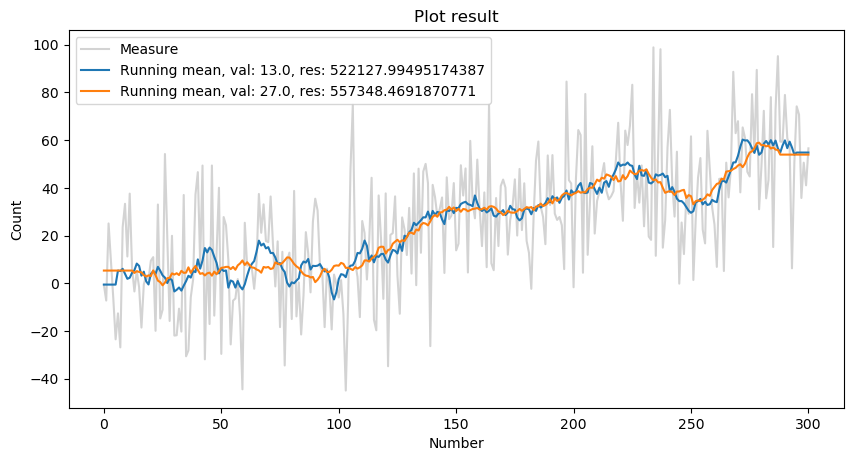

In [24]:
def plot_f(z, chvals, run, aname):
    new_plot('Plot result', 'Number', 'Count')
    plt.plot(z, label='Measure', c='lightgrey')
    for ai in chvals:
        r = run(ai)
        ki = Known_vals.DevVarInd(r)
        res = np.sum([ki[i]*b[i] for i in range(2)])
        plt.plot(r, label='{}, val: {}, res: {}'.format(aname, ai, res))
    plt.legend()
    # plt.show()

n = 10
# b = [0.02, 0.08]
b = [4, 4]
chvals = np.round(np.linspace(0, z.shape[0] * 0.4, n))[1:]

eval_params = partial(sm.eval_params, z, Known_vals.DevVarInd, b)

bestm, resm = eval_params(chvals, RM.run)
plot_f(z, bestm, RM.run, 'Running mean')
plt.savefig(fname='Running mean best.png')


a: 0.09090909090909091 ki: [529795.5932116238, 43.764407682073795] res: 529839.357619306
a: 0.18181818181818182 ki: [486497.2541640138, 793.7484327529959] res: 487291.00259676675
a: 0.2727272727272727 ki: [440278.0219888177, 4601.776621619952] res: 444879.79861043766
a: 0.36363636363636365 ki: [389937.3719156652, 16820.939269921568] res: 406758.3111855868
a: 0.4545454545454546 ki: [334546.8389983351, 47946.38693066528] res: 382493.2259290004
a: 0.5454545454545454 ki: [273876.59457923746, 117175.07115863086] res: 391051.6657378683
a: 0.6363636363636364 ki: [208812.21254108063, 258518.84572992017] res: 467331.0582710008
a: 0.7272727272727273 ki: [141667.99605837918, 531568.5436989455] res: 673236.5397573247
a: 0.8181818181818182 ki: [77111.60928385868, 1040782.0563063883] res: 1117893.6655902471
a: 0.9090909090909092 ki: [24207.77741165422, 1970772.615320405] res: 1994980.3927320591
best: [0.27272727 0.36363636 0.45454545 0.54545455] 4 [0.09090909 0.18181818 0.27272727 0.36363636 0.45454

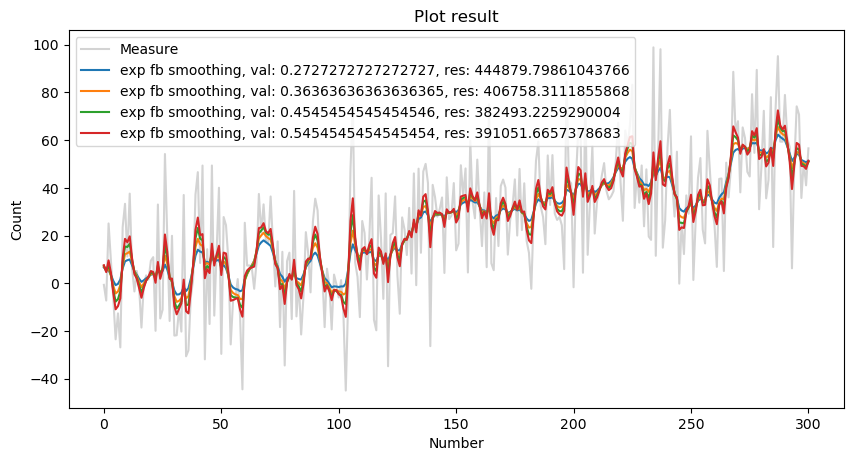

In [25]:

Expsmoothing = sm.FB_exp_smoothing(z)

probe_alpha = np.linspace(0, 1, n + 2)[1:-1]
best_alpha, resalpha = eval_params(probe_alpha, Expsmoothing.run_fb)

print("bestm: {}, best_alpha: {}".format(bestm, best_alpha))
plot_f(z, best_alpha, Expsmoothing.run_fb, 'exp fb smoothing')
plt.savefig(fname='exp fb smoothing best.png')


In [26]:

def proper_choise(m_vals, alpha_vals):
    m = m_vals
    a = alpha_vals

    res = 'exponential' if a < m else 'running mean'
    print("mean:{}, exp:{}".format(m_vals, alpha_vals))
    print(res)

proper_choise(resm, resalpha)

mean:522127.99495174387, exp:382493.2259290004
exponential
